In [ ]:
# This code generates figure 7

In [1]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

#Process data
import pandas as pd
import numpy as np

#Display data 
from matplotlib.axes import Axes
import matplotlib.pyplot as plt


In [2]:
variables=['tas','pr']
models0=['GFDL-ESM4','IPSL-CM6A-LR','MPI-ESM1-2-HR','MRI-ESM2-0','UKESM1-0-LL']
rcps=['SSP26','SSP60']

In [3]:
models0[0]

'GFDL-ESM4'

## climate data calculated by read_ISIMIP3b_yields_climateForece


In [4]:
annual_tm=np.load('annualTas_2ssp5Models_createdby_read_ISIMIP3b_yields.npy')

In [5]:
annual_pr=np.load('annualPr_2ssp5Models_createdby_read_ISIMIP3b_yields.npy')

In [6]:
annual_pr.shape

(85, 5, 2)

In [7]:
x=range(2015,2100)
y=annual_pr[:,0,0]
Y=np.convolve(y, np.ones(30)/30, mode='valid')

In [8]:
Y.shape

(56,)

In [9]:
annual_TM=np.empty(shape=(56,5,2))
annual_PR=np.empty(shape=(56,5,2))
for ircp in range(2):
    for imodel in range(5):
        annual_TM[:,imodel,ircp]=np.convolve(annual_tm[:,imodel,ircp],np.ones(30)/30,mode='valid')-273.15
        annual_PR[:,imodel,ircp]=np.convolve(annual_pr[:,imodel,ircp],np.ones(30)/30,mode='valid')        


In [10]:
X=range(2030,2086)

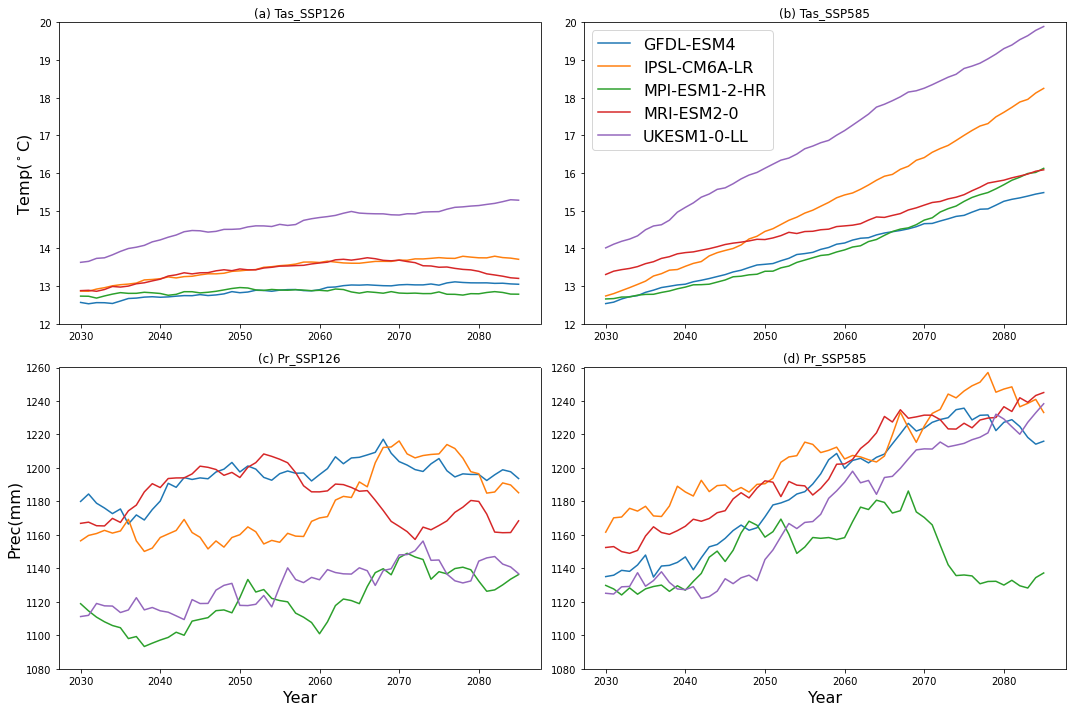

In [11]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].plot(X, annual_TM[:,:,0])
axs[0,0].set_ylim([12,20])
axs[0, 0].set_title("(a) Tas_SSP126")
axs[0,0].set_ylabel('Temp($^\circ$C)',fontsize=16)
[b,c,d,e,f]=axs[0, 1].plot(X, annual_TM[:,:,1])
axs[0,1].set_ylim([12,20])
axs[0, 1].set_title("(b) Tas_SSP585")
axs[0,1].legend([b,c,d,e,f], ['GFDL-ESM4','IPSL-CM6A-LR','MPI-ESM1-2-HR','MRI-ESM2-0','UKESM1-0-LL'], loc=0,fontsize=16)
#axs[1, 0].sharex(axs[0, 0])
axs[1, 0].plot(X, annual_PR[:,:,0])
axs[1,0].set_ylim([1080,1260])
axs[1, 0].set_title("(c) Pr_SSP126")
axs[1,0].set_ylabel('Prec(mm)',fontsize=16)
axs[1,0].set_xlabel('Year',fontsize=16)
axs[1, 1].plot(X, annual_PR[:,:,1])
axs[1,1].set_ylim([1080,1260])
axs[1, 1].set_title("(d) Pr_SSP585")
axs[1,1].set_xlabel("Year",fontsize=16)
fig.tight_layout()
fig.savefig('Figure_7_ISIMIP3B_ClimateForce.png')